# CISC873-DM-W23-A6
# Anti-Cancer Drug Activity Prediction

https://www.kaggle.com/competitions/cisc873-dm-w23-a6


✔️ Problem Formulation:
Define the problem. What is the input? What is the output? What data mining function is required? What could be the challenges? What is the impact? What is an ideal solution?

- 1 Define the problem  ?

In this assignment, It is a binary classification problem based on the graph data. The task is to predict the anticancer activity of a chemical compound using the chemical structure of the compound. The chemical compound can be positive or negative against lung cancer cell and thus labelled as either 0 or 1.

- 2 What is the input ? 

The data is in the form of graph which represents the chemical structure of the compound. Each sample of data contains information about the atoms and the connections between atoms of the molecule. So in this problem the features are the atoms and connections.

- 3 What is the output?

we are going to predict if The chemical compound can be positive or negative against lung cancer cell and thus labelled as either 0 or 1.
the probability of a chemical compound to be active for the cancer cell or not. The shape of pred is [batch_size,1]. Thus for each sample, the final output is a number which represents the probability associated with each chemical compound about its activity.

- 4 What data mining function is required ?

The model is classification model.
  classification is the technique to categorize elements in a collection,basis their predefined functionalities and properties. In classification, the model can classify new instances whose classification is unknown.
These particular instances that are used to create the model are called training data. Such a mechanism of classification uses methods like if-then,decision trees, neural networks, or even a set of classification rules These methods can be retrieved to identify future data.

- 5 What could be the challenges ?

The challenges that we have is to clean the data froma the noise in the dataset and preprocessing To convert the sdf data to the numeric form so that it can be trained on some model, t
Ans: The input file is structure data file (SDF). It contains information about the chemical composition of a molecule. SDF file store information about position of individual atom in the chemical compound and also tells about the connections. Different molecules are delimited by '$$$$' expression.

Each sample/molecule starts with header which tells about the name/title of the compound. Other sections includes information about Atom count, version number, connections etc. Atom block tells about the elements of the compound. Bond block block tells about the bonding structure of the compound. These both blocks are used in this assignment to get information about the compound and saving them in form of edges and nodes. Each node is the atom given in the chemical molecule

- 6 What is the impact ?

we are going to predict if The chemical compound can be positive or negative against lung cancer cell and thus labelled as either 0 or 1.
It is a binary classification problem based on the graph data. The task is to predict the anticancer activity of a chemical compound using the chemical structure of the compound. The chemical compound can be positive or negative against lung cancer cell and thus labelled as either 0 or 1 

the probability of a chemical compound to be active for the cancer cell or not. The shape of pred is [batch_size,1]. Thus for each sample, the final output is a number which represents the probability associated with each chemical compound about its activity.

- 7 What is an ideal solution ?

to my rate (aggreation method 2) after making appropriate preprocessing on the dataset to 
help the model to predict the right result after clean the data set and overcome our chalenges

✔️ Answer the questions below (briefly):

Q1: 🌈Based on the provided template, describe the format of the input file (sdf file).

Q2: 🌈What are the input tensors to the neural network model (their meaning, not just symbol)? What is each of their dims and their meaning (e.g. batch_size)?

Q3: 🌈For each dim of gnn_out, what does it symbolize? For each dim of avg, what does it symbolize?

Q4: 🌈What is the difference between segment_mean and tf.reduce_mean? For each dim of pred, what does it symbolize?

Q5: 🌈What is the motivation/theory/idea to use multiple gcn layers comparing to just one? How many layers were used in the template?

### Q1:

1-

The input file is a data structure file (SDF). It contains information about the chemical composition of a molecule. The positions of individual atoms in a chemical molecule, as well as the connections between them, are stored in SDF files. The term:
'$$$$' is used to distinguish between distinct compounds.

2 

The name/title of the substance is mentioned in the header of each sample/molecule. Details on the amount of Atoms, the version number, and connections, among other things, are included in other sections. The atom block describes the constituents of the chemical. The bond block describes the bonding structure of the chemical. In this assignment, both of these blocks are used to acquire information about the compound and record it as edges and nodes. In a chemical molecule, each node represents an atom.


### Q2:


1-

The input tensors in this network are:

data: In tokenized form, the data contains the nodes of the chemical molecule. Each compound's nodes are retrieved, then tokenized with the tokenizer, and then padded with the pad sequence method. Each batch has the shape [batch size*max len nodes], with batch size equaling the number of samples in the batch and max len nodes equaling the length of tokenized nodes after padding.

2
edge: edge is the input tensor that contains information about atom connections. [sum of all edges,2] is the form of an edge. The batch size is represented by the sum(no. of edges of each sample) of the sum of all edges. For example, in a batch of three samples, sample 1 has 21, sample 2 has 20, and sample 3 has 40 edges. As a result, the size of the edge tensor is [81,2].

3
node2graph: It is the segmented mean input tensor, which contains information about segmented ids. Each batch has the shape [batch size*max len nodes], with batch size equaling the number of samples in the batch and max len nodes equaling the length of tokenized nodes after padding.

### Q3:

gnn_out: [batch size node dimension,hidden layers] is the shape of the gnn out, where batch size node dimension is the input data (node) vector's dimension (dimension of tokenized vector for the complete batch). It represents the model's aggregation output for each hidden layer.

Average : The segmented mean of the gnn out is calculated using the segmented ids. The output of gnn out is [tokenized vector dimension, hidden layers] for each sample in the batch size. A segment id is assigned to each sample. As a result, segment mean represents one sample with one number for each hidden layer by taking the mean of all the output data in the gnn out output. The average tensor's final output is of the shape [batch size, hidden layer]. It's a method of gathering information for each sample and presenting it as mean data.


### Q4:

segment_mean; The average of data with the same segmented ids is calculated with segment mean.

reduce_mean: Computes the mean of elements across dimensions of a tensor given parameters.

pred: The final output (pred) indicates whether or not a chemical compound is active against cancer cells. [batch size,1] is the shape of pred. As a result, the final output for each sample is a number that represents the likelihood associated with each chemical compound's activity.


### Q5:

The number of layers in the default template is set to the gcn network's default value. The default layer is 4, as mentioned in the documentation. rgcn is the default message transmission technique (Graph convolution layers). Using several gcns makes it easier to correctly incorporate all graph complexity, resulting in a more accurate model.

What is the search space and what is the criteria to determine good/bad hyper-parameters?

the search space that we want to search for it to achieve the bets performance like the type of messaging passing also num if hidden_dim also optimizer and learning rate , batch size, epoches, max_vocab, max_length,.... we tune many time and change these hyperparameter to achieve and reach the model that give us high accuracy but the most imortant less lose.

## **Import Libraries**

In [50]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')
# for dealing with arrays
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#split data into feature and labels 
from sklearn.model_selection import train_test_split

## **Data Preparation**

Read SDF format data (structured-data format)

In [2]:
'''method to read sdf file
the chemical composition of a molecule is saved as SDF(structure data file) file
sdf file store information about position of individual atom
molecules are delimited by $$$$
the atom block lines start with '    ' and have information about atoms(C,O,N,Cl..)
bond block starts with ' ' and contains info about connection between atoms'''
#define function to read file sdf 
def read_sdf(file):
    with open(file, 'r') as rf: #opening the file in read mode
        content = rf.read()     #reading the contents of the file
    samples = content.split('$$$$') #split samples after every $$$$ 
#method to read each molecule configuration
#s represents one molecule
#define function to split data into nodes and its labels 
    def parse_sample(s):
        lines = s.splitlines()  #splitting the text data to lines
        links = []               #empty array for links
        nodes = []               #empty array for nodes
        label = 0
        for l in lines:          #loop over each line
            if l.strip() == '1.0':#if line has value 1.0 but label equal 1
                label = 1
            if l.strip() == '-1.0':#if line has value -1.0 but label equal 0
                label = 0
            if l.startswith('    '):#if the line start with '    ' set it as a node 
                feature = l.split()
                node = feature[3]
                nodes.append(node)
            elif l.startswith(' '):#if the line has ' ' space white but it in lnk 
                lnk = l.split()
                # edge: (from, to,) (1-based index)
                if int(lnk[0]) - 1 < len(nodes):
                    links.append((
                        int(lnk[0])-1, 
                        int(lnk[1])-1, # zero-based index
                        # int(lnk[2]) ignore edge weight
                    ))
        return nodes, np.array(links), label #then returning nodes, links and label
    
    return [parse_sample(s) for s in (samples) if len(s[0]) > 0] #parse_sample for each molecule

## **Steps**

What is the experimental protocol used and how was it carried out?

The first step is to read the sdf file to get the information about the atoms and their connectivity in the compound. The atoms are described as nodes and connections are described as edges. The read_sdf method is used to read sdf file and the chemical composition of the compound.

The nodes(atoms) are given as characters (like ['O','N','Cl'....]). Thus it is treated as sequence of text data and best way to describe the text data sequence to tokenize the data and then adding the embeddig layer.

Graph convolutional network is used in this assignment to calculate the probability of the output class. Different methods differ in implementing message passing methods as:

R-GCN Method: (Graph convolution layers) Compute new graph states by neural message passing.

R-GAT Method: (Relation graph attention network layer) Compute new graph states by neural message passing using attention.

R-GIN Method: (Relation Graph Isomorphism Network message propogation layer) Compute new graph states by neural message passing using MLPs for state updates and message computation.

GGNN Method: (Gated graph neural network layer) Compute new graph states by neural message passing and gated units on the nodes. This method works best for this problem as given in Aggregation Method 2 below.

In [3]:
#read train file sdf by calling function read_sdf()
training_set = read_sdf('train.sdf')
#split training data to train and validation by test size =0.15
training_set, validation_set = train_test_split(training_set, test_size=0.15,random_state=35)

In [4]:
#read test file sdf by calling function read_sdf()
testing_set  = read_sdf('test_x.sdf')

In [5]:
# this show how data look like (nodes and label and links)
print(training_set[1])

(['P', 'O', 'O', 'O', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], array([[ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  7],
       [ 1, 11],
       [ 2, 12],
       [ 4,  9],
       [ 4, 13],
       [ 5,  9],
       [ 5, 14],
       [ 6, 10],
       [ 7,  8],
       [ 7, 10],
       [ 8,  9],
       [11, 15],
       [12, 16],
       [13, 14]]), 0)


## **Visualizing/Inspecting a Sample**

NetworkX is a Python language software package for the 
creation, manipulation, and study of the structure, dynamics, 
and function of complex networks. It is used to study large 
complex networks represented in form of graphs with nodes and edges. 
Using networkx we can load and store complex networks

In [6]:
# --quiet to control the console log level.
!pip install --quiet networkx
import networkx as nx #import networkx to deal with nodes and edges
# data visualisation and manipulation
import matplotlib.pyplot as plt
# Builtin colormaps, colormap handling utilities, and the ScalarMappable mixin.
from matplotlib import cm 
colors = cm.rainbow(np.linspace(0, 1, 50))

In [7]:
#method to visualize the compound graph
#atoms are given as nodes
#the connections are defined as edges
def visualize(sample):
    G=nx.Graph() #initiating an instance of Graph
    nodes = sample[0]  #atoms as nodes
    edges = sample[1]  #connections as edges
    
    labeldict={}  #empty dictionary for labels for the nodes
    node_color=[] #empty array for each node color
    for i,n in enumerate(nodes): #for each node in the sample
        G.add_node(i) #adding node to the graph each node as (0,1,2,3..)
        labeldict[i]=n  #dictionary building with [key,value] as [0:'C']
        node_color.append(colors[hash(n)%len(colors)])

    # a list of nodes:
    for e in edges: #for each edge
        G.add_edge(e[0], e[1]) #adding egde to the graph from one connection to other connection
        
#drawing the graph with labels for nodes as atoms and connections as edges
    nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
    plt.show()
   #returns graph
    return G

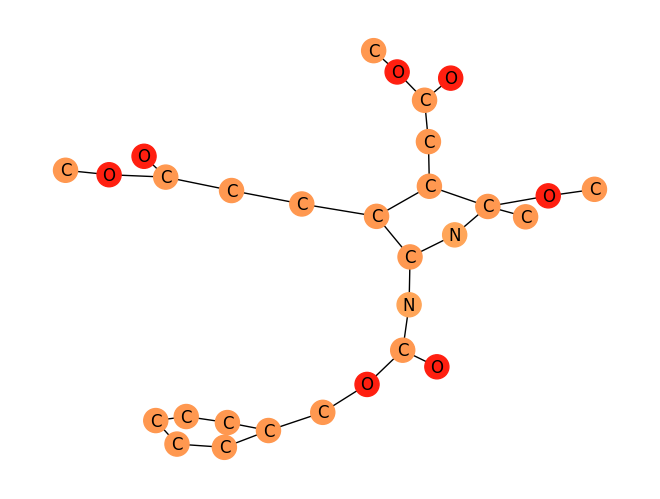

In [8]:
#displaying one sample
plt.clf() #to clear the current figure.
visualize(training_set[60])#visualize first 60 nodes of training set

## Data Preprocessing

The dataset used in this experiment contains 121 SMT-LIB files, which can be all transformed to
different Constrained Horn Clauses (CHC) files. From those CHC files, we can draw Horn graphs
and generate initial predicates. The GNN input is a json file that contains essential elements (e.g.
nodes and edges information) for the subsequent training of GNN. 

---

After reading the inputs from the json files, these raw inputs still need more adjustments so that
they can be shaped into appropriate sizes for feeding into the algorithm. The detailed steps are
shown below in Fig 3.2. Firstly, the build_vocabulary function uses the graph node symbols to
build the vocabulary set and token map.
In the vocabulary set, the build_vocabulary function eliminates the repetitive node symbols and
adds in a default set of “unknown symbols”. In the token map, it is a dictionary that contains the
map of the node symbols and a unique number. Then, the variables will go through the
form_GNN_inputs and labels function which uses the token map to obtain the
tokenized_node_label_ids. Tokenized_node_label_ids is the list of the numbers that represents
the node symbols according to the token map. After this stage, the data will be collected in a
dictionary called for later use.

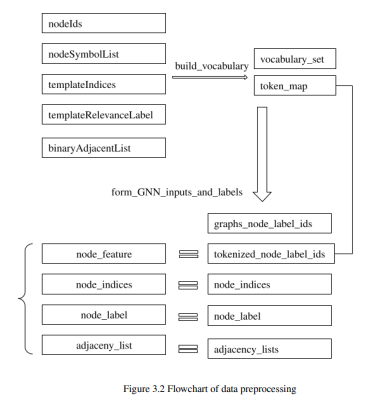

In [9]:
#Tokenizer importing 
from tensorflow.keras.preprocessing.text import Tokenizer
#vocabulary size
max_vocab = 500 #maximum vocab of words in each sentances 500
max_len = 100 #max length of sentences 


# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]
#training tokenizer
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [10]:
# pad_sequences is used to ensure that all sequences in a list have the same length.
# By default this is done by padding 0 in the beginning of each sequence until
#each sequence has the same length as the longest sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
#random data set 
import random
random.seed(1)
#define function to prepare single batch from samples 
def prepare_single_batch(samples):
    sample_nodes = [s[0] for s in samples]  #nodes characters array
    sample_nodes = tokenizer.texts_to_sequences(sample_nodes)#tokenizing the sample nodes
    sample_nodes = pad_sequences(sample_nodes, padding='post') #pad_sequences for each sample node with post padding
    max_nodes_len = np.shape(sample_nodes)[1]   #shape : (num of samples ,number of nodes)
    edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)] #s[1]:links,i*max_nodes_len :to start indexing from current node not from 0 again
    edges = [e for e in edges if len(e) > 0] #make sure all elements are non_zero
    node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]
    
    all_nodes = np.reshape(sample_nodes, -1)#concatenate nodes of all samples together 
    all_edges = np.concatenate(edges) #concatenate edges of all samples together (because edge is tuple ,doesn't hae reshape ,output is 20)

    node_to_graph = np.reshape(node_to_graph, -1)
    #returns a dictionary of features(data,edges,node2grah) and label
    return {
        'data': all_nodes,
        'edges': all_edges,
        'node2grah': node_to_graph,
    }, np.array([s[2] for s in samples])

#generating batch with given btch_size
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True: #infinity loop
        dataset = list(dataset) #data in the array
        if shuffle:             # if shuffle is True
            random.shuffle(dataset) #return data shuffled 
        l = len(dataset)
        for ndx in range(0, l, batch_size):#loop for  creating batches from given dataset
            batch_samples = dataset[ndx:min(ndx + batch_size, l)] #creating batch samples with given batch_size
            yield prepare_single_batch(batch_samples)  #returning a generator with prepared batches
        if not repeat:  #breaking loop if repeat is false
            break


In [11]:
# showing one batch of data set it has label , nodes and links
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items(): #batch zero has nodes and links 
        print(k)
        print(v)
        pass   #put batch[1] has label of this batch
    print('label', train_batch[1])
    break

data
[5 2 2 2 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 2 3 3 3 3 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 2 2 3 3 3 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
edges
[[ 0 16]
 [ 1  8]
 [ 1  9]
 [ 2  9]
 [ 3 11]
 [ 4  5]
 [ 4 11]
 [ 5 17]
 [ 5 18]
 [ 6  9]
 [ 6 10]
 [ 6 11]
 [ 7  8]
 [ 7 10]
 [ 7 12]
 [ 8 13]
 [12 14]
 [13 15]
 [14 15]
 [14 16]
 [17 19]
 [18 20]
 [19 21]
 [20 21]
 [22 29]
 [22 36]
 [23 33]
 [24 30]
 [24 33]
 [25 26]
 [25 30]
 [26 32]
 [27 34]
 [28 29]
 [28 30]
 [28 32]
 [29 31]
 [31 33]
 [31 34]
 [32 35]
 [44 46]
 [44 55]
 [45 48]
 [46 47]
 [46 48]
 [47 52]
 [47 53]
 [48 51]
 [49 50]
 [49 51]
 [49 56]
 [50 54]
 [50 57]
 [52 54]
 [53 55]
 [56 58]
 [57 59]
 [58 59]
 [66 71]
 [66 73]
 [67 74]
 [67 77]
 [68 71]
 [68 72]
 [69 73]
 [70 76]
 [71 74]
 [72 73]
 [72 76]
 [74 75]
 [75 78]
 [77 78]]
node2grah
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3


**After the data preprocessing**, it is the time to train the model. The main task used in this section is
called node binary classification task. This kind of entity classification is a common use for
RGCN , the prediction task would be predicting the labels of
the template nodes. To show the entire training process and the relationship of the input and
output data

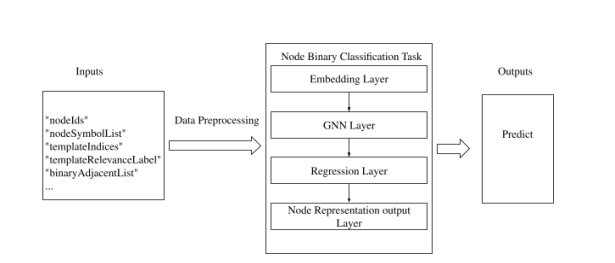

### Graph Neural Networks in TF2

```Graph Network (GN) block and Notation```

Graph neural networks operate on the graphs and structure their computation accordingly [15], a
graph as shown below in Fig 2.3 is formed by nodes and edges. Usually the nodes are denoted as
edges are denoted as and as a graph-level attribute represents global attribute, so

generally a graph is defined as a 3 tuple G = (u, V, E) 
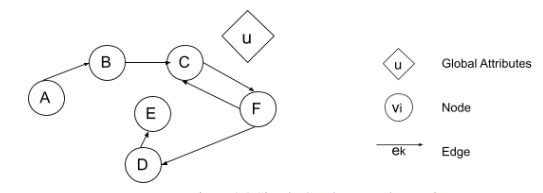


In [12]:
#first installing tf2_gnn
!pip install --quiet tf2_gnn
# https://github.com/microsoft/tf2-gnn
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#then we will use its layer in our model train 
from tf2_gnn.layers.gnn import GNN, GNNInput

##  Trail 1

 **Steps**

* in this trail I will use Embedding and tokenizer for nodes

* features of node was embedded 

* then I will define gnn input as a variable to define all input layers

* I will use default layers of gnn but I will set Params (hidden_dim) by  value 32  

* in this trail I will use **message_calculation_class** : **"GGNN"**

**Graph neural network (GNNs)**

is a way of analysing complex problems by portraying them with
compositions and interactions between the entities [3]. By structuring and reasoning about the
relations, the connectivity of the entities was introduced and utilized in this train of thought. In
this way, by aligning the relational structure

 **Graph Neural Networks in TensorFlow2**

The implementation of the graph neural network in this thesis is an open source framework called
tensorflow-2 graph neural network(tf2-gnn)1
. It provides the implementation and training scripts
of several kinds of graph neural networks based on TensorFlow 2.0 

**Embedding Layer**

there are several layers stacked in the node binary classification task for
processing the data, the first layer is the embedding layer. Normally machine learning models
take vector as input instead of string, therefore the node features need to be vectorized [20]. And
in this thesis in order to represent the words as numerical values, the word embedding method is
used. In this method, the length of each vector that specifies each word can be customized.
Additionally, the dense representation of the words are trainable values, which are also the
weights learnt during the training [20], the embedding will have a
matrix of size vocabulary_size by number of the dimension of output. In this experiment, the
dimension is set as 64 and the number of the vocabulary varies from different graphs


**GNN Layer**

Next layer stacked in the predicates selection task is the GNN layer. This prebuilt layer is
included in the tf2-gnn frame. The GNN layer takes four inputs which are node features,
adjacency list, node to graph map and number of the graphs. When calling for the GNN layer in
the task, the embedded node label from the previous embedding layer will be fed into the node
feature. Meanwhile, the adjacency list and node to graph map from inputs will be taken as the
GNN input as well. Number of the graphs implies the number of the graphs in the current batch

Inside the GNN layer there are also several layers such as message passing layer, global exchange
layer and dense layer. In the message passing layer, for implementing the message passing
neural network ,This layer will provide the frame for continuous
neighborhood aggregation by calculating the messages passed from a source node to target node.
In this layer an extended version of the GGNN model is implemented. This model utilizes the
multi-layer perceptrons(MLP) to learn aggregation and updates. The updates node representation

In [13]:
#import tensorflow framework
import tensorflow as tf 
# segment_mean is used to find the mean of elements in segments of a tensor.
from tensorflow.math import segment_mean
#import keras 
from tensorflow import keras
#Input() is used to instantiate a Keras tensor.
from tensorflow.keras import Input, Model
#Embedding layer enables us to convert each word into a fixed length vector of defined size
from tensorflow.keras.layers import Embedding, Dense
#import optimizers
from tensorflow.keras.optimizers import Adam ,SGD,RMSprop

In [14]:
'''
To understand the dimensions:
Let's assume the batch contains 10 samples of data.
The nodes are tokenized using 44 dimension array that is each sample node is of shape [44]
Thus 10 samples are of shape [440] after applying get_batch method
node2graph is also of shape [440] like [0,0,0,0,0,...,1,1,1,1,....2,2,2,....] each number is repeated 44 times [0,0,0,0,... 44 times]
Lets assume edges are of size [257,2]

The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.
'''

data = keras.Input(batch_shape=(None,)) #Input layer for nodes (tokenized text data) 

# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32) 
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data) #embedding layer over data with each token embedded as  size vector eg. [440,50]

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1  #calculating number of samples (or min(batch_size,no._of_samples))   

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

In [15]:
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 #defining hidden dimension of the gnn layer
#use GGNN as a calculation class 
params["message_calculation_class"]= "GGNN" #Gated Graph Neural Networks
#gnn layer with defined hyperparameters
gnn_layer = GNN(params)
#gnn output layer 
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn/StatefulPartitionedCall:0', description="created by layer 'gnn'")


In [16]:
# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)

#building model 
#inputs are data,edges and node2graph
#input: dictionary
#output: prediction value from dense layer
model = Model(
    inputs={                   # input 
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred              #output 
)
#printing summary of the model
model.summary() 

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean/SegmentMean:0', description="created by layer 'tf.math.segment_mean'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max (TFOpLambda  ()                  0  

`When finished with the GNN layer, the graph representation will be gathered and sent to MLPs to`
`perform the binary classification task. In the compute_task_output method, it implements the`
`regression layer that is formed by dense layers which are simple multilayer perceptrons (MLP).`
`These regression layers are used to perform binary classification task on gathered nodes`

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), #use Adam as optimizer 
    loss='BinaryCrossentropy', #label is binary classification so I used  BinaryCrossentropy 
    metrics=['AUC']            #as leaderbord metrics I used AUC
)

In [18]:
batch_size = 16
#math.ceil: returns the smallest integral value greater than the number
num_batchs = math.ceil(len(training_set) / batch_size)#no. of batches for training data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)#no. of batches for validation data
#fit model 
history1=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
1330/1330 [==============================] - 20s 13ms/step - loss: 0.1995 - auc: 0.6111 - val_loss: 0.1708 - val_auc: 0.6496
Epoch 2/10
1330/1330 [==============================] - 16s 12ms/step - loss: 0.1867 - auc: 0.6662 - val_loss: 0.1629 - val_auc: 0.7053
Epoch 3/10
1330/1330 [==============================] - 20s 15ms/step - loss: 0.1799 - auc: 0.7121 - val_loss: 0.1644 - val_auc: 0.7111
Epoch 4/10
1330/1330 [==============================] - 15s 11ms/step - loss: 0.1782 - auc: 0.7343 - val_loss: 0.1615 - val_auc: 0.7369
Epoch 5/10
1330/1330 [==============================] - 16s 12ms/step - loss: 0.1735 - auc: 0.7547 - val_loss: 0.1596 - val_auc: 0.7409
Epoch 6/10
1330/1330 [==============================] - 17s 13ms/step - loss: 0.1710 - auc: 0.7672 - val_loss: 0.1560 - val_auc: 0.7764
Epoch 7/10
1330/1330 [==============================] - 17s 13ms/step - loss: 0.1659 - auc: 0.7862 - val_loss: 0.1598 - val_auc: 0.7528
Epoch 8/10
1330/1330 [==========================

### PLot AUC and LOSS

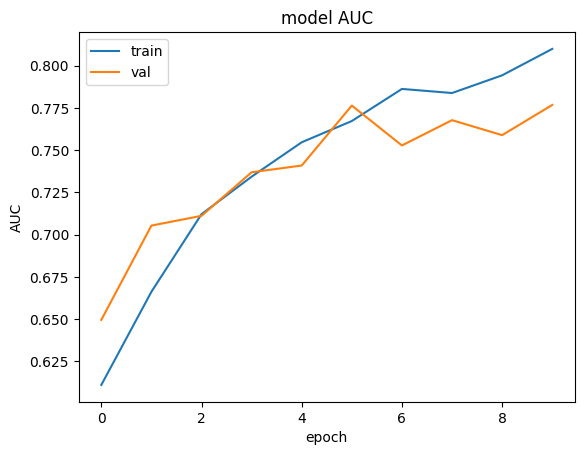

In [19]:
plt.plot(history1.history['auc'])
plt.plot(history1.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

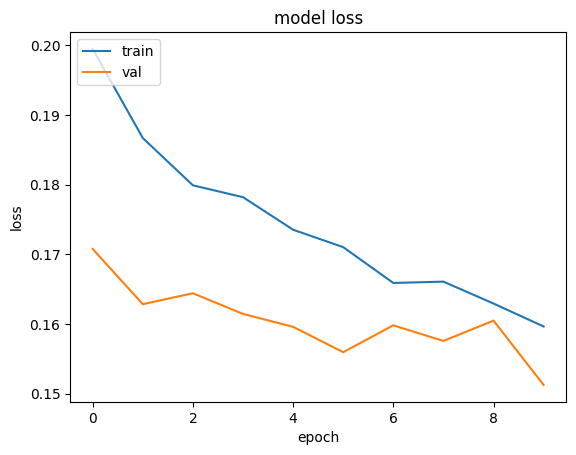

In [20]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Prediction**

In [21]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=22, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [22]:
len(y_pred)

12326

In [32]:
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('submission1.csv')

## **Observation_1**

* Gated Graph Neural Networks the accuracy is good

* loss was decreased

* when I used Adam optimizer I noticed that accuracy was increased clearly 

* with batch size 16 and epoch 10 

* I get score in public  0.77897

##  Trail 2

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* in this trail I will use **message_calculation_class** : **RGCN**

In [33]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

In [34]:
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "RGCN" #Relational Graph Convolutional Networks 
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_1/StatefulPartitionedCall:0', description="created by layer 'gnn_1'")


In [35]:
# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary() 

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_1/SegmentMean:0', description="created by layer 'tf.math.segment_mean_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_1 (TFOpLamb  ()           

In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), #use Adam as optimizer 
    loss='BinaryCrossentropy', #label is binary classification so I used  BinaryCrossentropy 
    metrics=['AUC']            #as leaderbord metrics I used AUC
)

In [37]:
batch_size = 15
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)
#fit Model
history2=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=15, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
1418/1418 [==============================] - 13s 8ms/step - loss: 0.2181 - auc: 0.5628 - val_loss: 0.1726 - val_auc: 0.6658
Epoch 2/10
1418/1418 [==============================] - 11s 8ms/step - loss: 0.1881 - auc: 0.6676 - val_loss: 0.1746 - val_auc: 0.6427
Epoch 3/10
1418/1418 [==============================] - 11s 8ms/step - loss: 0.1852 - auc: 0.6840 - val_loss: 0.1646 - val_auc: 0.7137
Epoch 4/10
1418/1418 [==============================] - 12s 8ms/step - loss: 0.1821 - auc: 0.7028 - val_loss: 0.1676 - val_auc: 0.7196
Epoch 5/10
1418/1418 [==============================] - 11s 8ms/step - loss: 0.1778 - auc: 0.7313 - val_loss: 0.1900 - val_auc: 0.7297
Epoch 6/10
1418/1418 [==============================] - 11s 7ms/step - loss: 0.1774 - auc: 0.7312 - val_loss: 0.1701 - val_auc: 0.7385
Epoch 7/10
1418/1418 [==============================] - 12s 8ms/step - loss: 0.1755 - auc: 0.7368 - val_loss: 0.1688 - val_auc: 0.6992
Epoch 8/10
1418/1418 [==============================] -

### AUC_plot and LOSS

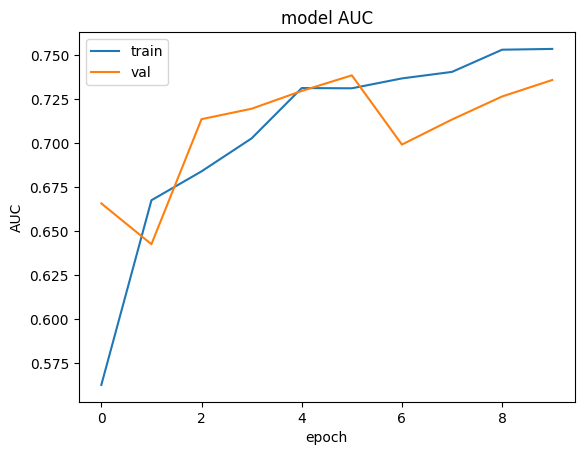

In [38]:
plt.plot(history2.history['auc'])
plt.plot(history2.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

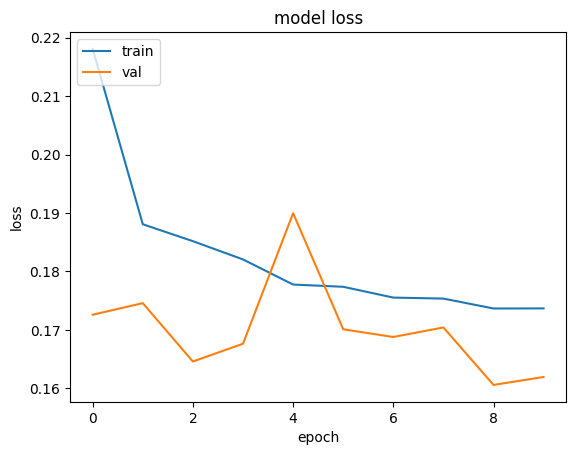

In [39]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Prediction**

In [40]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False))
y_pred = np.reshape(y_pred, -1)

In [41]:
import pandas as pd 
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('submission2.csv')

## **Observation_2**

* as we see when I used Relational Graph Convolutional Networks,the accuracy was not increased enough

* loss still same value 

* when I used Adam optimizer I noticed that accuracy was increased clearly 

* with batch size 16 and epoch 10 

* I get score in Public score: 0.78548

* So  RGCN is not best calculationn method 

## Trail 3

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* in this trail I will use **message_calculation_class** : **RGAT**

In [42]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,)

In [43]:
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "RGAT" #Relational Graph Attention Networks 
params["num_heads"]=32
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_2/StatefulPartitionedCall:0', description="created by layer 'gnn_2'")


In [44]:
# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary() 

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_2/SegmentMean:0', description="created by layer 'tf.math.segment_mean_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_2 (TFOpLamb  ()           

In [45]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), #use Adam as optimizer 
    loss='BinaryCrossentropy', #label is binary classification so I used  BinaryCrossentropy 
    metrics=['AUC']            #as leaderbord metrics I used AUC
)

In [46]:
batch_size = 300
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history3=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=6,
    validation_data=gen_batch(
        validation_set, batch_size=300, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/6
71/71 [==============================] - 49s 502ms/step - loss: 0.4906 - auc: 0.4609 - val_loss: 0.2630 - val_auc: 0.3589
Epoch 2/6
71/71 [==============================] - 34s 481ms/step - loss: 0.2822 - auc: 0.3614 - val_loss: 0.2489 - val_auc: 0.3636
Epoch 3/6
71/71 [==============================] - 33s 468ms/step - loss: 0.2829 - auc: 0.3626 - val_loss: 0.2653 - val_auc: 0.3538
Epoch 4/6
71/71 [==============================] - 33s 470ms/step - loss: 0.2795 - auc: 0.3613 - val_loss: 0.2480 - val_auc: 0.3720
Epoch 5/6
71/71 [==============================] - 35s 499ms/step - loss: 0.2766 - auc: 0.3701 - val_loss: 0.2664 - val_auc: 0.3592
Epoch 6/6
71/71 [==============================] - 35s 492ms/step - loss: 0.2744 - auc: 0.3644 - val_loss: 0.2482 - val_auc: 0.3901


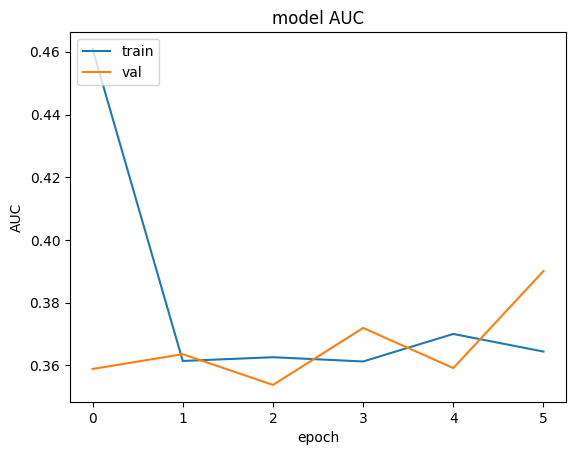

In [47]:
plt.plot(history3.history['auc'])
plt.plot(history3.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

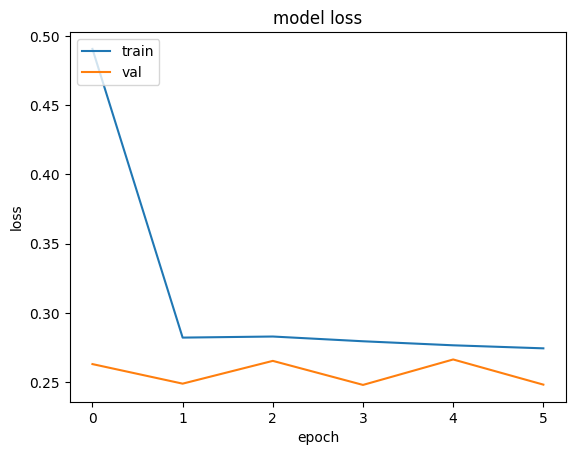

In [48]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Prediction**

In [49]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [50]:
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('submission3.csv')

## **Observation_3**

* as we see when I used Relational Graph Attention Networks,the accuracy was not increased enough

* loss still same value 

* when I used Adam optimizer I noticed that accuracy was increased clearly 

* with batch size 300 and epoch 6

* I get Public score: 0.36058

* So  RGAT is not best calculationn method 

## Trail 4

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* in this trail I will use **message_calculation_class** : **RGIN**

In [23]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

In [24]:
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "RGIN" #Relational Graph Isomorphism Networks 
params["num_aggr_MLP_hidden_layers"]=4
params["num_heads"]=32
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_1/StatefulPartitionedCall:0', description="created by layer 'gnn_1'")


In [25]:
# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_1/SegmentMean:0', description="created by layer 'tf.math.segment_mean_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_1 (TFOpLamb  ()           

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), #use Adam as optimizer 
    loss='BinaryCrossentropy', #label is binary classification so I used  BinaryCrossentropy 
    metrics=['AUC']            #as leaderbord metrics I used AUC
)

In [27]:
batch_size = 400
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history4=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=20,
    validation_data=gen_batch(
        validation_set, batch_size=400, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/20
54/54 [==============================] - 28s 468ms/step - loss: 0.5060 - auc: 0.4656 - val_loss: 0.2795 - val_auc: 0.3628
Epoch 2/20
54/54 [==============================] - 34s 632ms/step - loss: 0.2751 - auc: 0.3849 - val_loss: 0.2160 - val_auc: 0.4209
Epoch 3/20
54/54 [==============================] - 32s 589ms/step - loss: 0.2133 - auc: 0.5240 - val_loss: 0.1654 - val_auc: 0.6205
Epoch 4/20
54/54 [==============================] - 12s 224ms/step - loss: 0.2061 - auc: 0.5655 - val_loss: 0.1874 - val_auc: 0.6418
Epoch 5/20
54/54 [==============================] - 44s 819ms/step - loss: 0.1932 - auc: 0.6319 - val_loss: 0.1674 - val_auc: 0.6973
Epoch 6/20
54/54 [==============================] - 24s 457ms/step - loss: 0.1883 - auc: 0.6584 - val_loss: 0.1705 - val_auc: 0.6671
Epoch 7/20
54/54 [==============================] - 25s 459ms/step - loss: 0.1889 - auc: 0.6571 - val_loss: 0.1731 - val_auc: 0.6484
Epoch 8/20
54/54 [==============================] - 37s 687ms/step - 

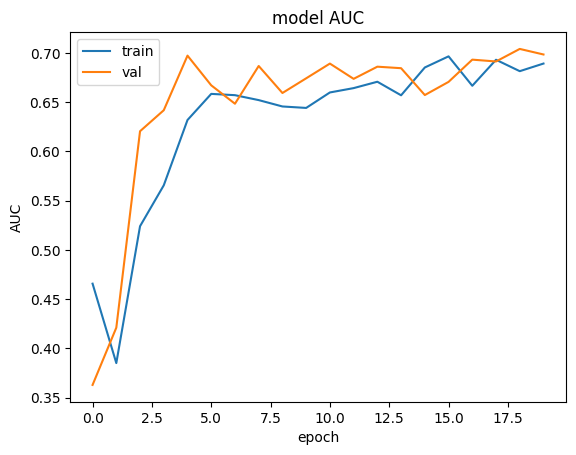

In [28]:
plt.plot(history4.history['auc'])
plt.plot(history4.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

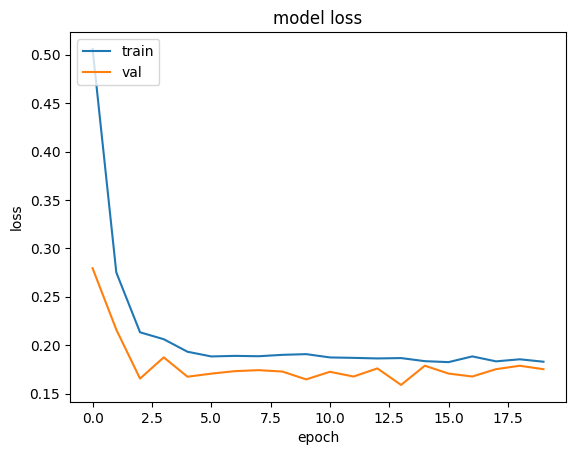

In [29]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Prediction**

In [30]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [31]:
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('submission4.csv')

## **Observation_4**

* as we see when I used Relational Graph Isomorphism Networks ,the accuracy was not increased enough

* loss still same value 

* when I used Adam optimizer I noticed that accuracy was increased clearly 

* with batch size 400 and epoch 20

* Got a public score of 0.73052

* So  RGIN is not best calculationn method 

## Trail 5

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* in this trail I will use **message_calculation_class** : **GNN-Edge-MLP**

In [32]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

In [33]:
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "GNN_Edge_MLP" #Graph Neural Network with Edge MLPs
# params["num_aggr_MLP_hidden_layers"]=4
# params["num_heads"]=32
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_2/StatefulPartitionedCall:0', description="created by layer 'gnn_2'")


In [34]:
# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_2/SegmentMean:0', description="created by layer 'tf.math.segment_mean_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_2 (TFOpLamb  ()           

In [35]:
model.compile(
    optimizer=tf.keras.optimizers.Adam( ),
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [36]:
batch_size = 45
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history5=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=20,
    validation_data=gen_batch(
        validation_set, batch_size=45, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/20
473/473 [==============================] - 53s 108ms/step - loss: 0.2737 - auc: 0.4481 - val_loss: 0.1792 - val_auc: 0.5970
Epoch 2/20
473/473 [==============================] - 31s 65ms/step - loss: 0.1956 - auc: 0.6094 - val_loss: 0.1810 - val_auc: 0.6613
Epoch 3/20
473/473 [==============================] - 21s 45ms/step - loss: 0.1904 - auc: 0.6374 - val_loss: 0.1690 - val_auc: 0.6772
Epoch 4/20
473/473 [==============================] - 51s 108ms/step - loss: 0.1901 - auc: 0.6442 - val_loss: 0.1697 - val_auc: 0.6839
Epoch 5/20
473/473 [==============================] - 36s 76ms/step - loss: 0.1868 - auc: 0.6672 - val_loss: 0.1867 - val_auc: 0.6329
Epoch 6/20
473/473 [==============================] - 22s 47ms/step - loss: 0.1860 - auc: 0.6673 - val_loss: 0.1652 - val_auc: 0.6934
Epoch 7/20
473/473 [==============================] - 36s 76ms/step - loss: 0.1841 - auc: 0.6871 - val_loss: 0.1707 - val_auc: 0.6777
Epoch 8/20
473/473 [==============================] - 22s 47

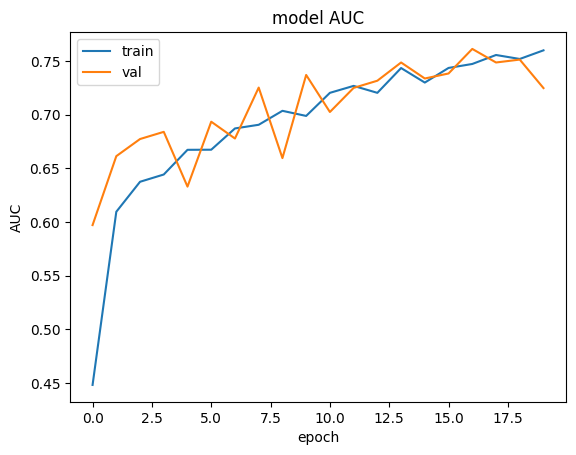

In [37]:
plt.plot(history5.history['auc'])
plt.plot(history5.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

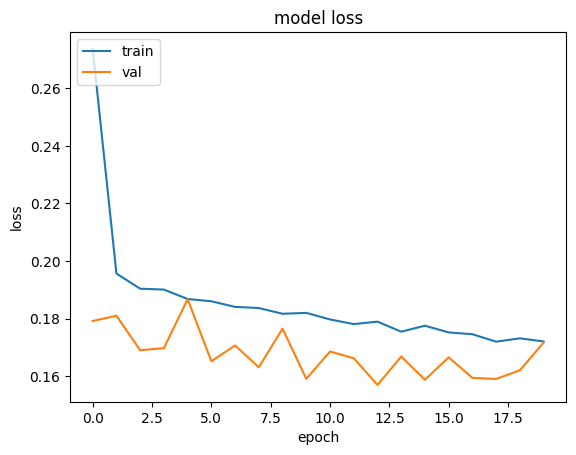

In [38]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Prediction

In [39]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=45, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [40]:
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('submission5.csv')

## **Observation_5**

* as we see when I used  Graph Neural Network with Edge MLPs ,the accuracy was not increased enough

* loss still same value 

* when I used Adam optimizer I noticed that accuracy was increased clearly 

* with batch size 45 and epoch 20

* Got a public score of 0.76063

* So  GNN_Edge_MLP is not best calculationn method 

## Trail 6

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* in this trail I will use **message_calculation_class** : **GNN_FiLM**

In [41]:
from tensorflow.python.ops.gen_math_ops import segment_max
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

In [42]:
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32 
#use GGNN as a calculation class 
params["message_calculation_class"]= "GNN_FiLM" 
params["film_parameter_MLP_hidden_layers"]=12
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_3/StatefulPartitionedCall:0', description="created by layer 'gnn_3'")


In [43]:
# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_max/SegmentMax:0', description="created by layer 'tf.math.segment_max'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_3/Sigmoid:0', description="created by layer 'dense_3'")
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_3 (TFOpLamb  ()                  

In [44]:
model.compile(
    optimizer=tf.keras.optimizers.Adam( ),
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [45]:
batch_size = 150
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history6=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=9,
    validation_data=gen_batch(
        validation_set, batch_size=150, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/9
142/142 [==============================] - 51s 336ms/step - loss: 0.2752 - auc: 0.5057 - val_loss: 0.1864 - val_auc: 0.6178
Epoch 2/9
142/142 [==============================] - 52s 369ms/step - loss: 0.2042 - auc: 0.5641 - val_loss: 0.1761 - val_auc: 0.6351
Epoch 3/9
142/142 [==============================] - 53s 379ms/step - loss: 0.1935 - auc: 0.6261 - val_loss: 0.1759 - val_auc: 0.6855
Epoch 4/9
142/142 [==============================] - 52s 365ms/step - loss: 0.1862 - auc: 0.6650 - val_loss: 0.1647 - val_auc: 0.6888
Epoch 5/9
142/142 [==============================] - 38s 267ms/step - loss: 0.1850 - auc: 0.6817 - val_loss: 0.1679 - val_auc: 0.6883
Epoch 6/9
142/142 [==============================] - 58s 405ms/step - loss: 0.1864 - auc: 0.6757 - val_loss: 0.1848 - val_auc: 0.7181
Epoch 7/9
142/142 [==============================] - 30s 212ms/step - loss: 0.1815 - auc: 0.7049 - val_loss: 0.1638 - val_auc: 0.6976
Epoch 8/9
142/142 [==============================] - 57s 404ms

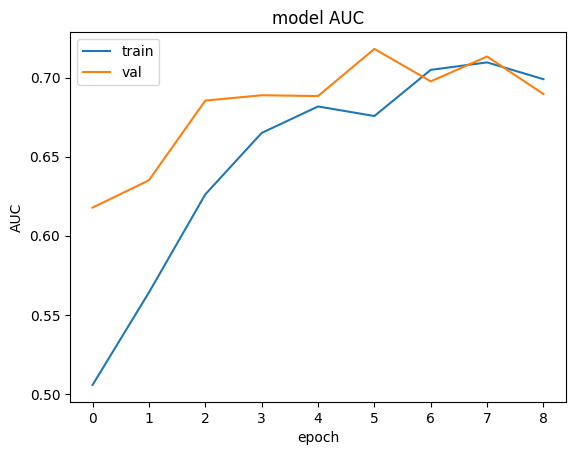

In [46]:
plt.plot(history6.history['auc'])
plt.plot(history6.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

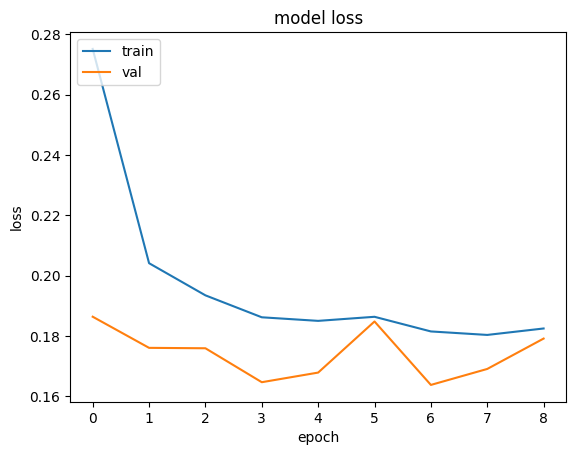

In [47]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Prediction

In [48]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=150, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [49]:
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('submission6.csv')

## **Observation_6**

* as we see when I used  Graph Neural Networks with Feature-wise Linear Modulation  ,the accuracy was not increased enough

* loss still same value 

* when I used Adam optimizer I noticed that accuracy was increased clearly 

* with batch size 150 and epoch 9

* Got a public score of 0.73523

* So  GNN-FiLM is not best calculationn method 

## Trail 7

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* also i will use RMSprop optimizer not adam

In [51]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 60)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

In [52]:
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
#"message_calculation_class" configures the message passing style. 
# This chooses the tf2_gnn.layers.message_passing.* layer used in each step.
params = GNN.get_default_hyperparameters()
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)
print('pred:', pred)
# create model 
model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='gnn_4/StatefulPartitionedCall:0', description="created by layer 'gnn_4'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='tf.math.segment_max_1/SegmentMax:0', description="created by layer 'tf.math.segment_max_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_4/Sigmoid:0', description="created by layer 'dense_4'")
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []           

In [53]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [54]:
batch_size = 150
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history7=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=9,
    validation_data=gen_batch(
        validation_set, batch_size=150, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/9
142/142 [==============================] - 39s 265ms/step - loss: 0.2962 - auc: 0.5082 - val_loss: 0.1697 - val_auc: 0.6811
Epoch 2/9
142/142 [==============================] - 42s 296ms/step - loss: 0.1913 - auc: 0.6387 - val_loss: 0.1673 - val_auc: 0.6909
Epoch 3/9
142/142 [==============================] - 26s 185ms/step - loss: 0.1890 - auc: 0.6557 - val_loss: 0.1665 - val_auc: 0.7133
Epoch 4/9
142/142 [==============================] - 40s 282ms/step - loss: 0.1875 - auc: 0.6633 - val_loss: 0.1717 - val_auc: 0.7026
Epoch 5/9
142/142 [==============================] - 42s 297ms/step - loss: 0.1836 - auc: 0.6910 - val_loss: 0.1606 - val_auc: 0.7102
Epoch 6/9
142/142 [==============================] - 16s 108ms/step - loss: 0.1826 - auc: 0.6968 - val_loss: 0.1644 - val_auc: 0.7096
Epoch 7/9
142/142 [==============================] - 33s 237ms/step - loss: 0.1817 - auc: 0.6985 - val_loss: 0.1703 - val_auc: 0.6849
Epoch 8/9
142/142 [==============================] - 12s 80ms/

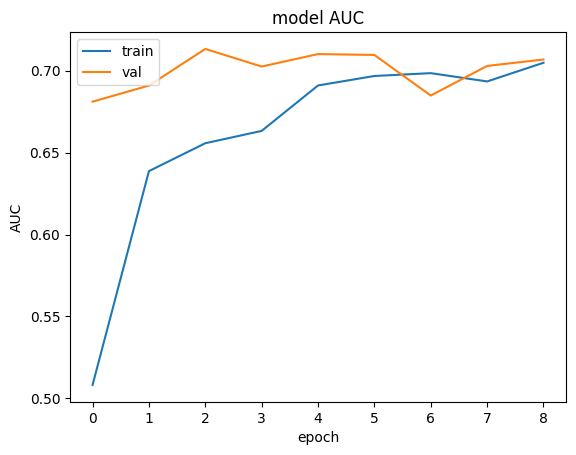

In [55]:
plt.plot(history7.history['auc'])
plt.plot(history7.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

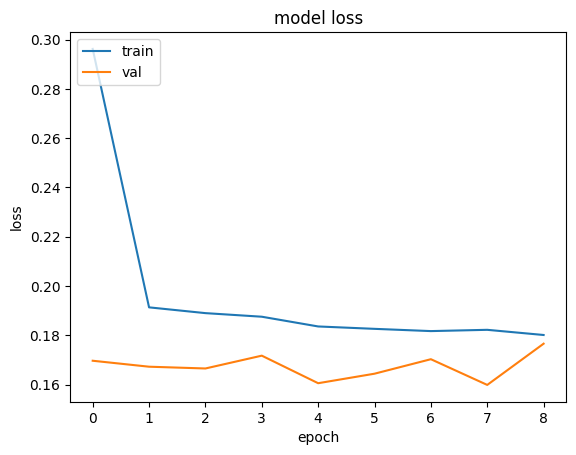

In [56]:
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Prediction

In [57]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=150, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [58]:
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('submission7.csv')

## **Observation_7**

* as we see when I used  default layer and RMSprop optimizer ,the accuracy was not increased enough

* loss still same value 

* when I used RMSprop optimizer I noticed that accuracy not increased clearly 

* with batch size 150 and epoch 9

* Got a public score of 0.70665

* So  default layer not the best 

## Trail 8

Upsampling

`Upsampling refers to manually adding data samples to the minority classes in order to create a more balanced dataset.`

`Upsampling By Copying Minority Class Instances`

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* `also i will use adam optimizer`
*` I will use upsampling method to make the data balanced`

* in this trail I will use message_calculation_class :**GGNN**

In [59]:
#read train file sdf by calling function read_sdf()
training_set = read_sdf('train.sdf')

In [60]:
np.unique(np.array(training_set)[:,2],return_counts=True)

(array([0, 1], dtype=object), array([23806,  1218], dtype=int64))

In [61]:
from pandas.core.frame import DataFrame
DataFrame(np.array(training_set))

,0,1,2
0,"[S, O, O, O, O, N, N, N, C, C, C, C, C, C, C, ...","[[0, 8], [0, 14], [1, 10], [2, 11], [3, 7], [4...",0
1,"[O, O, O, O, O, O, N, N, N, C, C, C, C, C, C, ...","[[0, 6], [0, 15], [1, 15], [2, 7], [3, 8], [4,...",0
2,"[F, F, F, O, O, O, O, O, N, N, C, C, C, C, C, ...","[[0, 19], [1, 19], [2, 19], [3, 16], [4, 28], ...",0
3,"[Cl, S, S, O, O, O, O, N, N, N, N, C, C, C, C,...","[[0, 12], [1, 15], [1, 18], [2, 4], [2, 5], [2...",0
4,"[S, O, O, N, N, N, N, N, N, C, C, C, C, C, C, ...","[[0, 1], [0, 2], [0, 5], [0, 9], [3, 4], [3, 1...",0
...,...,...,...
25019,"[O, O, O, O, O, O, N, N, C, C, C, C, C, C, C, ...","[[0, 8], [0, 14], [1, 10], [2, 12], [3, 13], [...",0
25020,"[O, O, O, O, O, N, C, C, C, C, C, C, C, C, C, ...","[[0, 9], [1, 11], [2, 16], [2, 19], [3, 16], [...",0
25021,"[O, O, O, O, O, O, O, O, O, N, C, C, C, C, C, ...","[[0, 12], [0, 16], [1, 10], [2, 11], [3, 15], ...",0
25022,"[S, O, O, O, O, N, N, N, C, C, C, C, C, C, C, ...","[[0, 11], [0, 12], [1, 21], [1, 27], [2, 22], ...",0


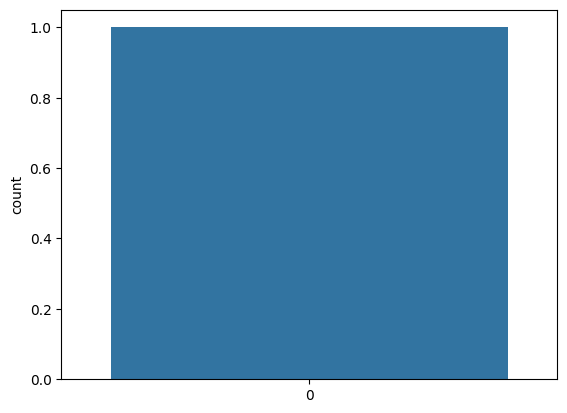

In [63]:
#check balance of data

g = sns.countplot(DataFrame(np.array(training_set)[:,2]).all())
# g.set_xticklabels([0,1])
plt.show()

In [64]:
print(DataFrame(np.array(training_set)[:,2]).value_counts())

0    23806
1     1218
dtype: int64


In [ ]:
DataFrame(np.array(training_set)).rename(columns = {0:'nodes', 1:'edges',2:'label'}, inplace = True)

In [65]:
DataFrame(np.array(training_set))[2]

0        0
1        0
2        0
3        0
4        0
        ..
25019    0
25020    0
25021    0
25022    0
25023    0
Name: 2, Length: 25024, dtype: object

<AxesSubplot: ylabel='Type'>

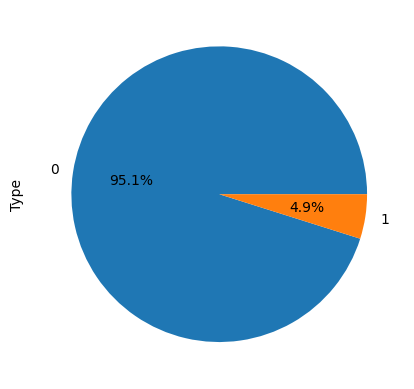

In [66]:
DataFrame(np.array(training_set)).groupby(2).size().plot(kind='pie',
                                       y = DataFrame(np.array(training_set))[2],
                                       label = "Type",
                                       autopct='%1.1f%%')

In [67]:
label_0 = DataFrame(np.array(training_set))[DataFrame(np.array(training_set))[2] == 0]
label_1 = DataFrame(np.array(training_set))[DataFrame(np.array(training_set))[2] == 1]
print(label_0.shape)
print(label_1.shape)

(23806, 3)
(1218, 3)


In [68]:
X_train = pd.DataFrame(np.array(training_set)[:,:-1])
y_train = pd.DataFrame(np.array(training_set)[:,2])

In [69]:
from sklearn.utils import resample

resampling = X_train.copy()
resampling[2] = y_train.values
class_0 = resampling[resampling[2]==0]
class_1 = resampling[resampling[2]==1]
class_1_after = resample(class_1, replace=True,n_samples=23806)
df_upsampled = pd.concat([class_0, class_1_after])

In [70]:
# Display new class counts
df_upsampled[2].value_counts()

0    23806
1    23806
Name: 2, dtype: int64

<AxesSubplot: ylabel='Type'>

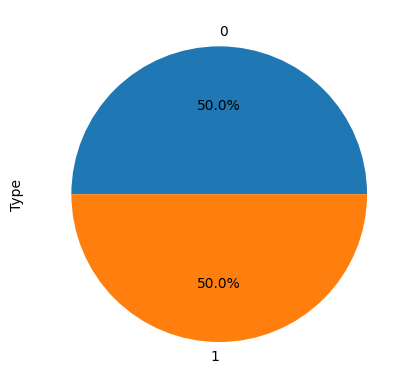

In [71]:
#visualize data 
df_upsampled.groupby(2).size().plot(kind='pie',
                                       y = df_upsampled[2],
                                       label = "Type",
                                       autopct='%1.1f%%')

In [72]:
training_set = df_upsampled.values.tolist() # to return data from dataframe to arry

## Visualizing/Inspecting a Sample

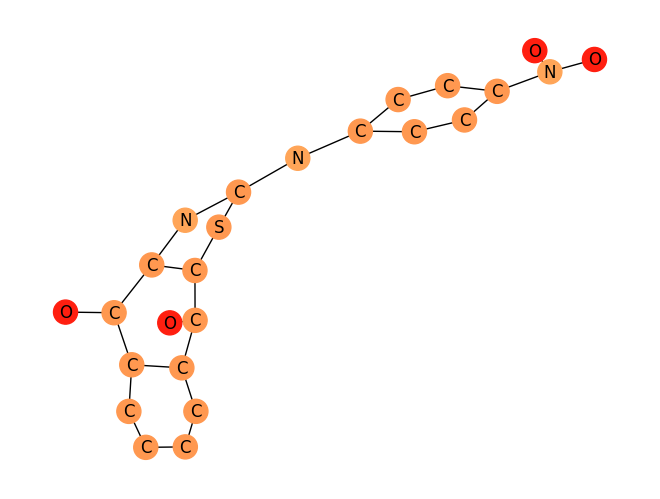

In [73]:
plt.clf()
visualize(training_set[0])

In [74]:
print('length of training_set:', len(training_set))
print('length of traiing_set[0]:', len(training_set[0]))
print('length of testing_set:', len(testing_set))
print('length of testing_set[0]:', len(testing_set[0]))

length of training_set: 47612
length of traiing_set[0]: 3
length of testing_set: 12326
length of testing_set[0]: 3


In [75]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items():          #k: labels, v: values
        print(k)
        print(v)
        #print(len(v))
        pass
    print('label', train_batch[1])
    break

data
[5 2 2 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 2 2 2 3
 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 6 6 6 3 3 3 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 3 3 3 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
edges
[[  0  17]
 [  1  14]
 [  2  28]
 [  3   7]
 [  3  11]
 [  3  14]
 [  4  12]
 [  5  25]
 [  5  28]
 [  6   7]
 [  6   8]
 [  6   9]
 [  7  13]
 [  8  10]
 [  8  15]
 [  9  11]
 [  9  17]
 [ 10  12]
 [ 10  16]
 [ 12  13]
 [ 14  19]
 [ 15  18]
 [ 16  20]
 [ 18  20]
 [ 19  21]
 [ 21  22]
 [ 22  23]
 [ 22  24]
 [ 23  26]
 [ 24  27]
 [ 25  26]
 [ 25  27]
 [ 28  29]
 [ 32  45]
 [ 33  46]
 [ 34  54]
 [ 35  54]
 [ 36  42]
 [ 36  44]
 [ 36  47]
 [ 37  43]
 [ 37  44]
 [ 38  43]
 [ 38  46]
 [ 38  48]
 [ 39  45]
 [ 39  46]
 [ 39  49]
 [ 40  41]
 [ 40  44]
 [ 41  51]
 [ 42  43]
 [ 42  45]
 [ 50  51]
 [ 50  52]
 [ 50  53]
 [ 52  54]
 [ 52  55]
 [ 53  56]
 [ 55  57]
 [ 56  57]
 [ 64  90]
 [ 65  90]
 [ 66  90]
 [ 67  71]
 [ 67  72]
 [

In [76]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #edge is 2D
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

In [77]:
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32
params["message_calculation_class"]= "GGNN"
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_5/StatefulPartitionedCall:0', description="created by layer 'gnn_5'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_max_2/SegmentMax:0', description="created by layer 'tf.math.segment_max_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []           

In [78]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC'],
    optimizer='Adam')

In [79]:
batch_size = 16
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history8=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=16, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
2976/2976 [==============================] - 61s 20ms/step - loss: 0.5757 - auc: 0.7659 - val_loss: 0.5287 - val_auc: 0.8198
Epoch 2/10
2976/2976 [==============================] - 57s 19ms/step - loss: 0.4830 - auc: 0.8498 - val_loss: 0.5326 - val_auc: 0.8789
Epoch 3/10
2976/2976 [==============================] - 61s 20ms/step - loss: 0.4062 - auc: 0.8976 - val_loss: 0.2583 - val_auc: 0.9042
Epoch 4/10
2976/2976 [==============================] - 64s 22ms/step - loss: 0.3570 - auc: 0.9218 - val_loss: 0.3803 - val_auc: 0.9314
Epoch 5/10
2976/2976 [==============================] - 65s 22ms/step - loss: 0.3139 - auc: 0.9395 - val_loss: 0.2875 - val_auc: 0.9459
Epoch 6/10
2976/2976 [==============================] - 63s 21ms/step - loss: 0.2814 - auc: 0.9508 - val_loss: 0.3101 - val_auc: 0.9595
Epoch 7/10
2976/2976 [==============================] - 61s 20ms/step - loss: 0.2537 - auc: 0.9597 - val_loss: 0.2370 - val_auc: 0.9656
Epoch 8/10
2976/2976 [==========================

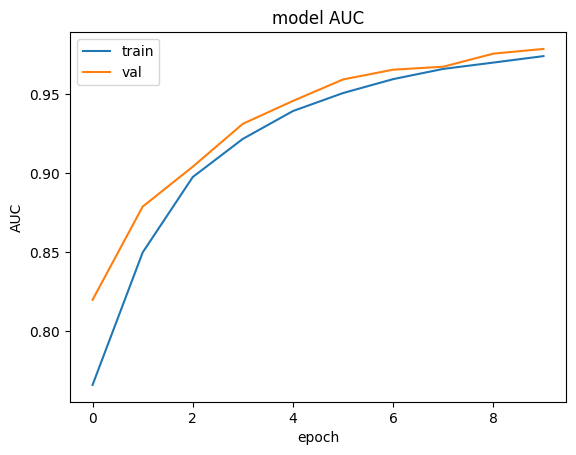

In [80]:
plt.plot(history8.history['auc'])
plt.plot(history8.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

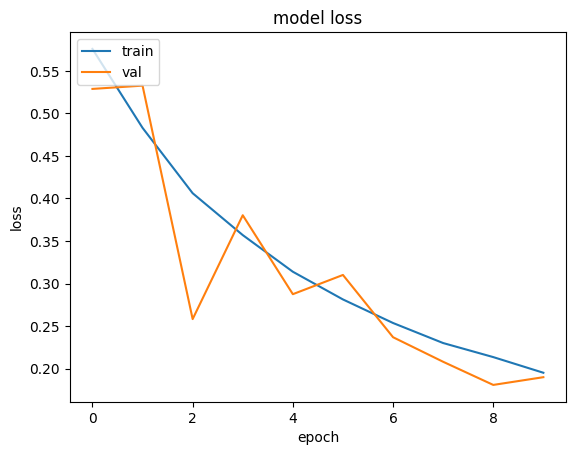

In [81]:
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Prediction

In [82]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [83]:
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('submission8.csv')

## Observation 8

* `as we see when I used  default layer and Adam optimizer ,the accuracy was  increased` 

* `loss still was decreased `

*` when I used adam optimizer I noticed that accuracy was increased clearly` 

* `with batch size 16 and epoch 8`

* `I used upsambling method and GGNN layer ,so the accuracy was increased than data unbalanced `

`Public score: 0.87915`

## Trail 9

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* `also i will use adam optimizer`
*` I will use upsampling method to make the data balanced`

* `in this trail I will use default layer with upsamoling method and still use adam optimizer` 

In [84]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #edge is 2D
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

In [85]:
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
# params["hidden_dim"] = 32
# params["message_calculation_class"]= "GGNN"
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='gnn_6/StatefulPartitionedCall:0', description="created by layer 'gnn_6'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='tf.math.segment_max_3/SegmentMax:0', description="created by layer 'tf.math.segment_max_3'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_6/Sigmoid:0', description="created by layer 'dense_6'")
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []           

In [86]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC'],
    optimizer='Adam'
)

In [87]:
batch_size = 200
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history9=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=200, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
239/239 [==============================] - 38s 154ms/step - loss: 0.6470 - auc: 0.6627 - val_loss: 0.5575 - val_auc: 0.7263
Epoch 2/10
239/239 [==============================] - 75s 312ms/step - loss: 0.6068 - auc: 0.7245 - val_loss: 0.6098 - val_auc: 0.7288
Epoch 3/10
239/239 [==============================] - 51s 212ms/step - loss: 0.5991 - auc: 0.7354 - val_loss: 0.5753 - val_auc: 0.7503
Epoch 4/10
239/239 [==============================] - 62s 259ms/step - loss: 0.5922 - auc: 0.7443 - val_loss: 0.5384 - val_auc: 0.7504
Epoch 5/10
239/239 [==============================] - 71s 296ms/step - loss: 0.5898 - auc: 0.7470 - val_loss: 0.5854 - val_auc: 0.7513
Epoch 6/10
239/239 [==============================] - 56s 235ms/step - loss: 0.5848 - auc: 0.7530 - val_loss: 0.5196 - val_auc: 0.7678
Epoch 7/10
239/239 [==============================] - 43s 179ms/step - loss: 0.5799 - auc: 0.7589 - val_loss: 0.5547 - val_auc: 0.7460
Epoch 8/10
239/239 [==============================] - 6

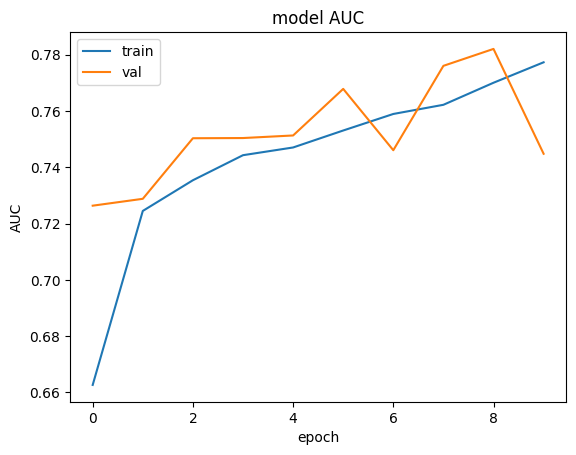

In [88]:
plt.plot(history9.history['auc'])
plt.plot(history9.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

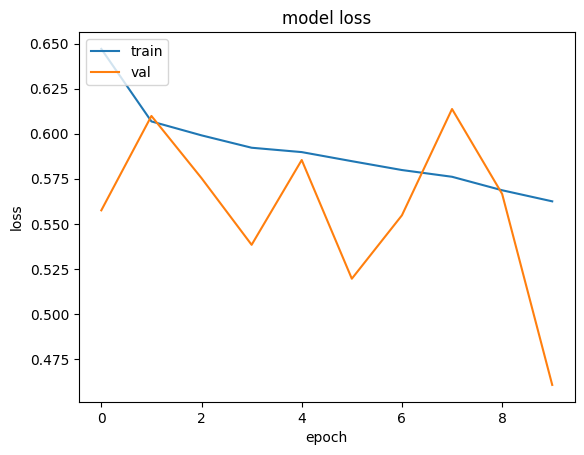

In [89]:
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Prediction

In [90]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [91]:
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('submission9.csv')

## **Observation_9**

* `as we see when I used  default layer and Adam optimizer ,the accuracy was  increased` 

* `loss still was decreased `

*` when I used adam optimizer I noticed that accuracy was increased clearly` 

* `with batch size 16 and epoch 8`

* `I used upsambling method ,so the accuracy was increased than  data unbalanced `

* `In this trail i used default layer but use upsampling method ,so the accuracy not increased enough but still better than data unbalanced `

`Public score: 0.78551`

## Trail 10

 **Steps**

* `in this trail I will use Embedding and tokenizer for nodes`

* `features of node was embedded `

* `then I will define gnn input as a variable to define all input layers`

* ` I will use default layers of gnn but I will set Params (hidden_dim) by  value 32 ` 

* `also i will use adam optimizer`
*` I will use upsampling method to make the data balanced`

* `in this trail I will use  layer of gnn but i will tune them by another values too ,I will use  upsamoling method and still use adam optimizer` 
* `I will set message_calculation_class= "GGNN"`
* `I will set hidden_dim =32`
* `I will set num_layers = 8`
* `I will set dense_every_num_layers = 4`
* `set residual_every_num_layers =4`
* `set layer_input_dropout_rate =0.001`
* `set global_exchange_mode = "mlp" `
* `set global_exchange_every_num_layers =3`
* `set global_exchange_dropout_rate =0.3`


In [92]:
# the first dim is different to the previous one. it is the total number of edges in this batch
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)     #edge is 2D
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
embeded = Embedding(tokenizer.num_words, 20)(data)

# number of graphs (number of samples)
num_graph = tf.reduce_max(node2graph)+1

gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

In [93]:
# https://github.com/microsoft/tf2-gnn/blob/master/tf2_gnn/layers/gnn.py
params = GNN.get_default_hyperparameters()
params["hidden_dim"] = 32
params["message_calculation_class"]= "GGNN"
# params["initial_node_representation_activation"]= "tanh"
# params["dense_intermediate_layer_activation"]= "tanh"
params["num_layers"]= 8
params["dense_every_num_layers"]= 4
params["residual_every_num_layers"]= 4
params["layer_input_dropout_rate"]= 0.001
          
params["global_exchange_mode"]= "mlp"
params["global_exchange_every_num_layers"]=3

params["global_exchange_dropout_rate"]=0.3
gnn_layer = GNN(params)
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_7/StatefulPartitionedCall:0', description="created by layer 'gnn_7'")


In [94]:
# https://www.tensorflow.org/api_docs/python/tf/math/segment_mean
avg = segment_max(
    data=gnn_out,
    segment_ids=node2graph
)
print('mean:', avg)

pred = Dense(1, activation='sigmoid')(avg)        #binary classification: Dense(2), but here we only output 1 probability
print('pred:', pred)

model = Model(
    inputs={
        'data': data,
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)
model.summary()

mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_max_4/SegmentMax:0', description="created by layer 'tf.math.segment_max_4'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_7/Sigmoid:0', description="created by layer 'dense_7'")
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_7 (TFOpLamb  ()              

In [95]:
model.compile(
    loss='BinaryCrossentropy',
    metrics=['AUC'],
    optimizer='Adam'
)

In [96]:
batch_size = 160
num_batchs = math.ceil(len(training_set) / batch_size)
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

history10=model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=10,
    validation_data=gen_batch(
        validation_set, batch_size=160, repeat=True
    ),
    validation_steps=num_batchs_validation,
)

Epoch 1/10
298/298 [==============================] - 170s 558ms/step - loss: 0.6418 - auc: 0.6743 - val_loss: 0.6295 - val_auc: 0.7340
Epoch 2/10
298/298 [==============================] - 141s 474ms/step - loss: 0.5921 - auc: 0.7471 - val_loss: 0.6198 - val_auc: 0.8058
Epoch 3/10
298/298 [==============================] - 140s 472ms/step - loss: 0.5553 - auc: 0.7866 - val_loss: 0.6659 - val_auc: 0.8088
Epoch 4/10
298/298 [==============================] - 146s 490ms/step - loss: 0.5170 - auc: 0.8225 - val_loss: 0.5910 - val_auc: 0.8377
Epoch 5/10
298/298 [==============================] - 149s 499ms/step - loss: 0.4755 - auc: 0.8547 - val_loss: 0.3775 - val_auc: 0.8755
Epoch 6/10
298/298 [==============================] - 151s 507ms/step - loss: 0.4395 - auc: 0.8781 - val_loss: 0.4144 - val_auc: 0.8727
Epoch 7/10
298/298 [==============================] - 151s 507ms/step - loss: 0.4081 - auc: 0.8961 - val_loss: 0.5324 - val_auc: 0.9111
Epoch 8/10
298/298 [============================

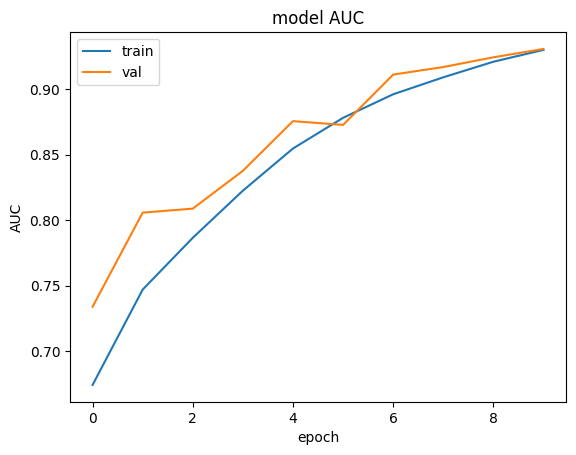

In [97]:
plt.plot(history10.history['auc'])
plt.plot(history10.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

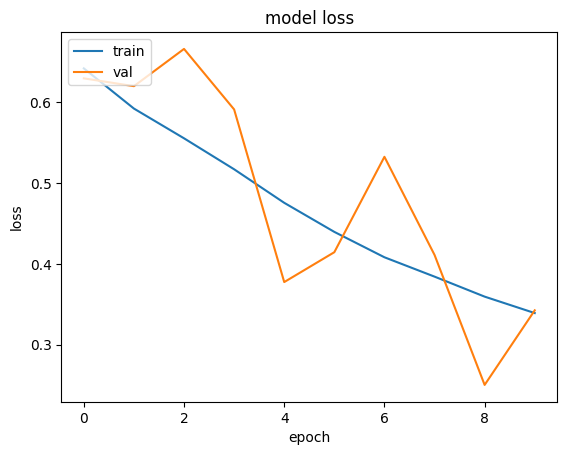

In [98]:
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Prediction**

In [99]:
y_pred = model.predict(
    gen_batch(testing_set, batch_size=15, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

In [100]:
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('submission10.csv')

## **Observation_10**

* `as we see when I used  default layer and Adam optimizer ,the accuracy was  increased` 

* `loss still was decreased `

*` when I used adam optimizer I noticed that accuracy was increased clearly` 

* `with batch size 16 and epoch 8`

* `I used upsambling method ,so the accuracy was increased than  data unbalanced `

* `so the accuracy not increased enough but still better than data unbalanced `
* `I notice that the default layer with GGNN and Upsampling method (Trial 8) is the best` 

`Public score: 0.82638`